In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("games_original.csv")
df 

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [3]:
print("(rows, columns) : ")
print(df.shape)

(rows, columns) : 
(20058, 16)


 - `df.info()` allow us to see the missing values in the dataframe.
Here we can see that we miss values in `Teacher_Quality`, `Parental_Education_Level` and `Distance_from_Home`

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB
None


# Features
 - Feature (Variable, Attribute): A column in a dataset, representing a measurable property or characteristic of the data
 - `df.columns` allows us to get the dataset features list 

In [5]:
features = df.columns
if 'index' in features:
    features.remove('index')
print("Features list :") 
for f in features:
    print(" - ", f)

Features list :
 -  id
 -  rated
 -  created_at
 -  last_move_at
 -  turns
 -  victory_status
 -  winner
 -  increment_code
 -  white_id
 -  white_rating
 -  black_id
 -  black_rating
 -  moves
 -  opening_eco
 -  opening_name
 -  opening_ply


## Correlation Matrix

First, to understand the relationship between the features, we can use the correlation matrix.
for the matrix to be relevant, we need to have only numerical features.
We can change the type of the features that we are going to store in a new dataframe.

In [6]:
# function to get the correlation between two numerical features
def get_correlation(df, feature1, feature2):
    return df[feature1].corr(df[feature2])

# Function to plot the correlation matrix
def plot_correlation_matrix(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()


Let us create some function to plot some interesting information about the features.

In [7]:
def plot_distribution(df, feature,kde = False):
    plt.figure(figsize=(10, 6))
    if kde :
        sns.kdeplot(df[feature],fill=True)
    else :
        sns.countplot(data=df, x=feature, hue=feature, palette='coolwarm')
    plt.title(f"Distribution of {feature} vs Unrated Games")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f"{feature} distribution")
    plt.show()

Let us analyze the features 1 by 1 :

## 1. id

  - *Data Type* : string
  - *Description* : The id of the game
    
We can see that some of the game ids are duplicated. We can check if the rows are identical and if they are we can drop the duplicates.

Not interesting for the analysis. It is just an identifier.

In [8]:
feature = features[0]
df[feature].describe()

count        20058
unique       19113
top       XRuQPSzH
freq             5
Name: id, dtype: object

In [9]:
# Check if the id is duplicated
print("Number of duplicated ids : ", df[feature].duplicated().sum())

# Check if the rows are identical
print("Number of duplicated rows : ", df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)
df

# 

Number of duplicated ids :  945
Number of duplicated rows :  429


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


As we will see in the third feature analyzed in this notebook (3. Timestamps) some of the timestamp in the dataset are more precise than others. To avoid the bias of the less precise timestamps, we will keep the most precise ones.

In [10]:
def timestamp_precision(timestamp):
    # Convert the timestamp to a string and split by the dot
    timestamp_str = str(timestamp).split('.')[0]
    zero_count = 0
    for digit in timestamp_str:
        if digit == '0':
            zero_count +=1
        else:
            zero_count = 0
        
    return len(timestamp_str) - zero_count

# Function to keep the most precise row
def keep_most_precise(df):
    # Sort by game ID and precision of timestamps
    df['created_at_precision'] = df['created_at'].apply(timestamp_precision)
    df['last_move_at_precision'] = df['last_move_at'].apply(timestamp_precision)
    df['total_precision'] = df['created_at_precision'] + df['last_move_at_precision']
    
    # Sort by game ID and total precision, then drop duplicates keeping the most precise
    df = df.sort_values(by=['id', 'total_precision'], ascending=[True, False])
    df = df.drop_duplicates(subset='id', keep='first')
    
    # Drop the precision columns
    df = df.drop(columns=['created_at_precision', 'last_move_at_precision', 'total_precision'])
    
    # sort by index
    df = df.sort_index()
    
    return df

# Apply the function to keep the most precise rows
df = keep_most_precise(df)

# Save the cleaned dataset
df.to_csv('games_cleaned.csv', index=False)
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


## 2. rated
- *Data Type* : binary
- *Description* : Whether the game is rated or not

Might be interesting. To train our AI model we might consider only the rated games to avoid the bias of unrated games.

In [11]:
feature = features[1]
df[feature].describe()

count     19113
unique        2
top        True
freq      15467
Name: rated, dtype: object

We can see that the feature is binary. Let us see the distribution of the values.

In [12]:
print(df[feature].value_counts())


rated
True     15467
False     3646
Name: count, dtype: int64


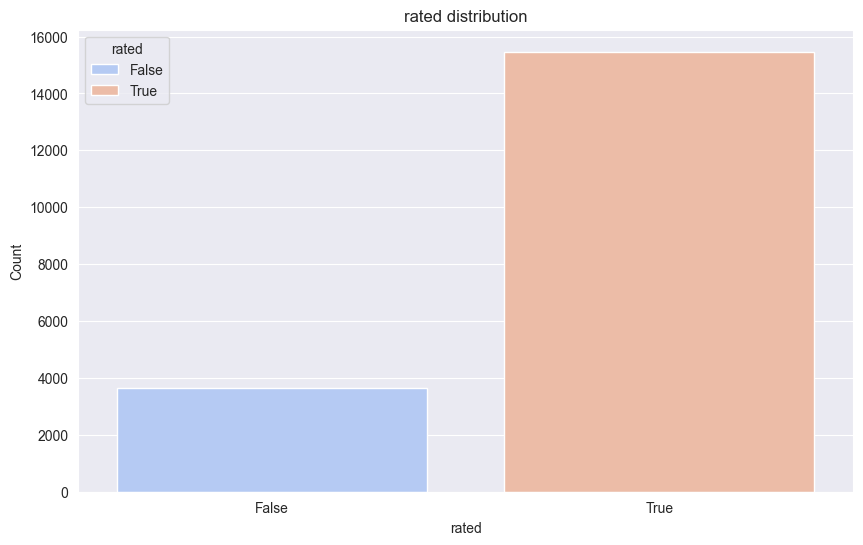

In [13]:
plot_distribution(df, feature)

## 3. Timestamps
- *Data Type* : datetime
- *Description* : The date of the creation of the game and the last move
- *Note* : We can extract the time difference between the two dates to get the duration of the game however we think that half of the values provided in the dataset are rounded which makes the features less relevant.

In [14]:
feature = features[2]
print(df[feature].describe()) 
feature = features[3]
print(df[feature].describe())

print()

count    1.911300e+04
mean     1.483413e+12
std      2.833975e+10
min      1.376772e+12
25%      1.476910e+12
50%      1.495670e+12
75%      1.503080e+12
max      1.504493e+12
Name: created_at, dtype: float64
count    1.911300e+04
mean     1.483414e+12
std      2.833964e+10
min      1.376772e+12
25%      1.476912e+12
50%      1.495670e+12
75%      1.503080e+12
max      1.504494e+12
Name: last_move_at, dtype: float64



If we explore the csv file we can notice that the first rows of the dataset has a very less precise timestamp than the last rows. That explains the fact that, when doing the difference between the two timestamps, we get a lot of 0 values.

In [15]:
print("First and last timestamps :")
print(df['created_at'][0])
print(df['created_at'][df.shape[0] - 1])
print()
print("Converted to datetime :")
print(pd.to_datetime(df['created_at'][0], unit='ms'))
print(pd.to_datetime(df['created_at'][df.shape[0] - 1], unit='ms'))

# Fin the row where the timestamp is the most precise
print()
print("Most precise timestamp :")
print(df['created_at'].apply(timestamp_precision).idxmax())

First and last timestamps :
1504210000000.0
1502909228257.0

Converted to datetime :
2017-08-31 20:06:40
2017-08-16 18:47:08.257000

Most precise timestamp :
9287


In [16]:
time_difference = df['last_move_at'] - df["created_at"]
time_difference.describe()

count    1.911300e+04
mean     8.722275e+05
std      4.908789e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.522440e+05
75%      7.991660e+05
max      6.058447e+08
dtype: float64

In [17]:
time_df = df[['created_at', 'last_move_at']].copy()
time_df.loc[:, 'created_at'] = time_df['created_at']
time_df.loc[:, 'last_move_at'] = time_df['last_move_at']

# Now convert to datetime
time_df['created_at'] = pd.to_datetime(time_df['created_at'], unit='ms')
time_df['last_move_at'] = pd.to_datetime(time_df['last_move_at'], unit='ms')

# Verify the changes
print(time_df['created_at'].head())
print(time_df['last_move_at'].head())

0   2017-08-31 20:06:40
1   2017-08-30 21:53:20
2   2017-08-30 21:53:20
5   2017-09-01 04:26:40
6   2017-09-01 01:40:00
Name: created_at, dtype: datetime64[ns]
0   2017-08-31 20:06:40
1   2017-08-30 21:53:20
2   2017-08-30 21:53:20
5   2017-09-01 04:26:40
6   2017-09-01 01:40:00
Name: last_move_at, dtype: datetime64[ns]


In [18]:
df['game_duration'] = time_df['last_move_at'] - time_df['created_at']
print(df['game_duration'].describe())
df

count                        19113
mean     0 days 00:14:32.227499189
std      0 days 01:21:48.789346451
min                0 days 00:00:00
25%                0 days 00:00:00
50%         0 days 00:04:12.244000
75%         0 days 00:13:19.166000
max         7 days 00:17:24.701000
Name: game_duration, dtype: object


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0 days 00:00:00
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0 days 00:00:00
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0 days 00:00:00
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4,0 days 00:00:00
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,0 days 00:05:21.734000
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,0 days 00:12:24.219000
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,0 days 00:02:52.834000
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,0 days 00:15:46.699000


Let us only analyse the precise timestamps to not get biased by the less precise ones.

In [19]:
# function to keep the rows with timestamp precision superior to n
def most_precise(cdf, n):
    # Calculate the precision of the 'created_at' timestamps
    cdf['created_at_precision'] = cdf['created_at'].apply(timestamp_precision)
    cdf['last_move_at_precision'] = cdf['last_move_at'].apply(timestamp_precision)
    
    # Filter the DataFrame to keep rows with 'created_at_precision' greater than n
    n = 8
    filtered_df = cdf[(cdf['created_at_precision'] > n) & (cdf['last_move_at_precision'] > n)]
    
    # Drop the 'created_at_precision' column if no longer needed
    filtered_df = filtered_df.drop(columns=['created_at_precision'])  
    filtered_df = filtered_df.drop(columns=['last_move_at_precision'])
    # Display the filtered DataFrame
    return filtered_df

# Filter the DataFrame to include only rows with non-zero game duration
precise_duration_df = most_precise(df, 8)

# Display the new DataFrame
precise_duration_df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration
9287,cr5iuIrQ,True,1.425386e+12,1.425386e+12,3,outoftime,white,6+8,dmka,1362,arfhan,1265,e4 d5 e5,B01,Scandinavian Defense,2,0 days 00:09:15.324000
9288,FtVjeTvc,False,1.424254e+12,1.424255e+12,50,mate,black,19+30,arfhan,1265,lasttry,1500,d4 d5 Nc3 Nf6 Nf3 e6 e4 dxe4 Ne5 c5 Bg5 cxd4 N...,D01,Queen's Pawn Game: Chigorin Variation,4,0 days 00:15:16.013000
9289,qblESqQn,False,1.424253e+12,1.424254e+12,30,mate,black,19+30,lasttry,1500,arfhan,1265,e4 e5 Nf3 Nf6 Nc3 Nc6 d4 d5 dxe5 dxe4 exf6 exf...,C47,Four Knights Game: Scotch Variation,7,0 days 00:14:45.794000
9290,SeWWAAH8,False,1.424252e+12,1.424253e+12,50,mate,black,19+30,arfhan,1265,lasttry,1500,e3 e5 Nf3 Nc6 h4 Nf6 Bc4 d5 Bd3 e4 Bb5 exf3 gx...,A00,Van't Kruijs Opening,1,0 days 00:13:31.024000
9291,niw2zjOi,True,1.421311e+12,1.421312e+12,10,outoftime,black,8+0,spitfire999,1099,alin86,1574,e4 d5 c3 dxe4 a4 Nf6 h4 Bg4 Qb3 b6,B01,Scandinavian Defense,2,0 days 00:08:30.205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,0 days 00:05:21.734000
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,0 days 00:12:24.219000
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,0 days 00:02:52.834000
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,0 days 00:15:46.699000


In [20]:
# convert to minutes
precise_duration_df['game_duration'] = precise_duration_df['game_duration'].dt.total_seconds()/60
precise_duration_df['game_duration'].describe()

count    10359.000000
mean        15.302127
std        100.913983
min          0.032033
25%          6.346417
50%         11.038833
75%         17.010492
max      10097.411683
Name: game_duration, dtype: float64

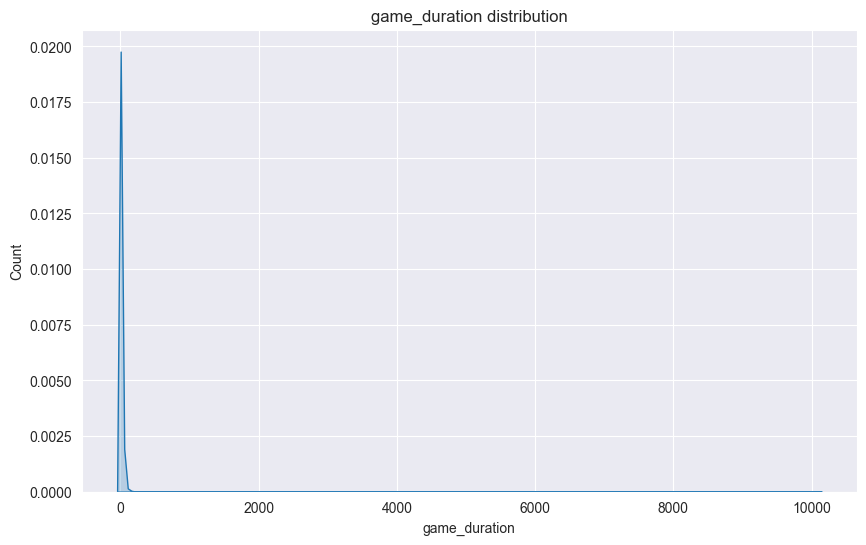

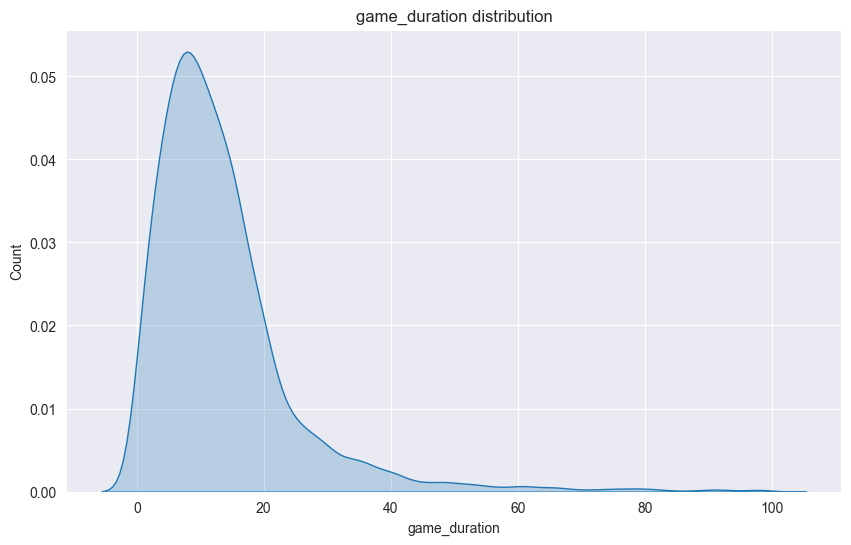

In [21]:
plot_distribution(precise_duration_df, 'game_duration', kde=True)
# plot ditribution of the game duration for duration < 100 minutes to have a better view
plot_distribution(precise_duration_df[precise_duration_df['game_duration'] < 100], 'game_duration', kde=True)

## 4. turns
- *Data Type* : integer
- *Description* : The number of turns in the game

In [22]:
df['turns'].describe()

count    19113.000000
mean        60.513839
std         33.488264
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

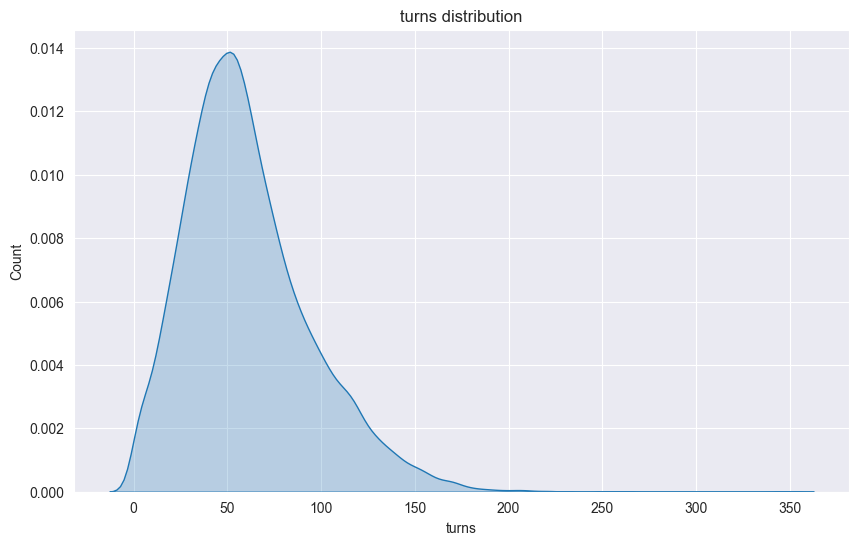

In [23]:
plot_distribution(df, 'turns', kde=True)

We can note that the plot is very similar to the game duration plot. Let us see the correlation between the two features in the restricted precise dataset.

In [24]:
print(get_correlation(precise_duration_df, 'turns', 'game_duration'))
# let us restrain the dataset to the games with less than 100 minutes to avoid the bias of very long games
print("Correlation between the number of turns and the game duration for games with less than 100 minutes :")
print(get_correlation(precise_duration_df[precise_duration_df['game_duration'] < 100], 'turns', 'game_duration'))


0.04853487522686743
Correlation between the number of turns and the game duration for games with less than 100 minutes :
0.4653321125251168


## 5. victory_status
- *Data Type* : string
- *Description* : The status of the game. It can be one of the following values : 'outoftime', 'resign', 'mate', 'draw'

In [25]:
df['victory_status'].describe()

count      19113
unique         4
top       resign
freq       10695
Name: victory_status, dtype: object

In [26]:
df['victory_status'].value_counts()

victory_status
resign       10695
mate          5974
outoftime     1598
draw           846
Name: count, dtype: int64

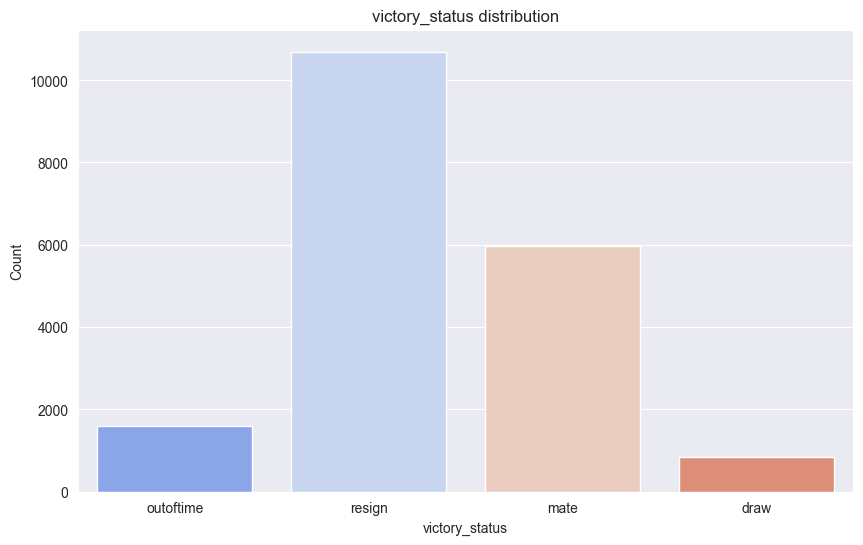

In [27]:
plot_distribution(df, 'victory_status')

## 6. winner
- *Data Type* : string
- *Description* : The winner of the game. It can be one of the following values : 'white', 'black', 'draw'

In [28]:
df['winner'].describe()

count     19113
unique        3
top       white
freq       9545
Name: winner, dtype: object

In [29]:
df['winner'].value_counts()

winner
white    9545
black    8680
draw      888
Name: count, dtype: int64

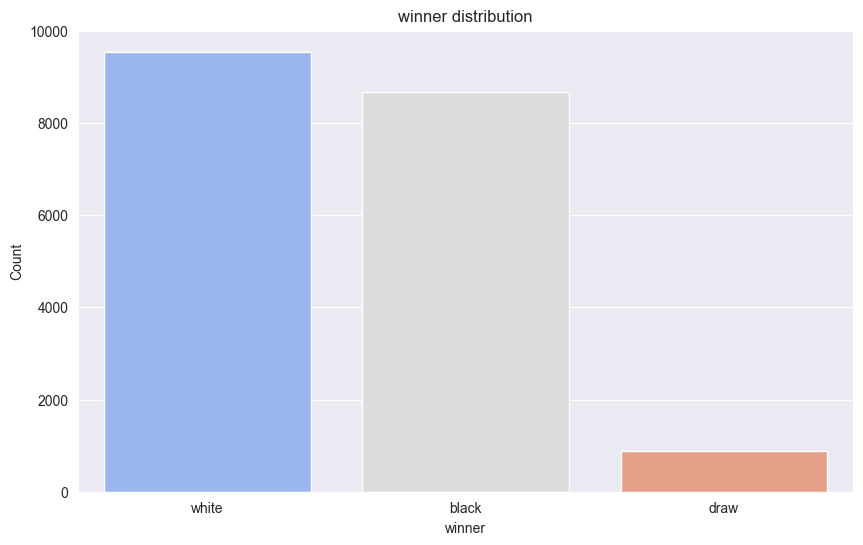

In [30]:
plot_distribution(df, 'winner')

## 7. increment_code
- *Data Type* : string
- *Description* : The increment code of the game
- [Time control - Wikipedia](https://en.wikipedia.org/wiki/Time_control) : The first number refers to the number of minutes per player, while the second number refers to the seconds of increment per move. Increment is how many seconds are added to the clock for each move that is played. If the first numbe
- We can extract the minutes and the seconds of increment per move to have a better understanding of the feature.

In [31]:
df['increment_code'].describe()

count     19113
unique      400
top        10+0
freq       7356
Name: increment_code, dtype: object

In [36]:
df['increment_code'].value_counts()


increment_code
10+0     7356
15+0     1258
15+15     821
5+5       723
5+8       678
         ... 
60+40       1
35+8        1
4+9         1
8+45        1
14+15       1
Name: count, Length: 400, dtype: int64

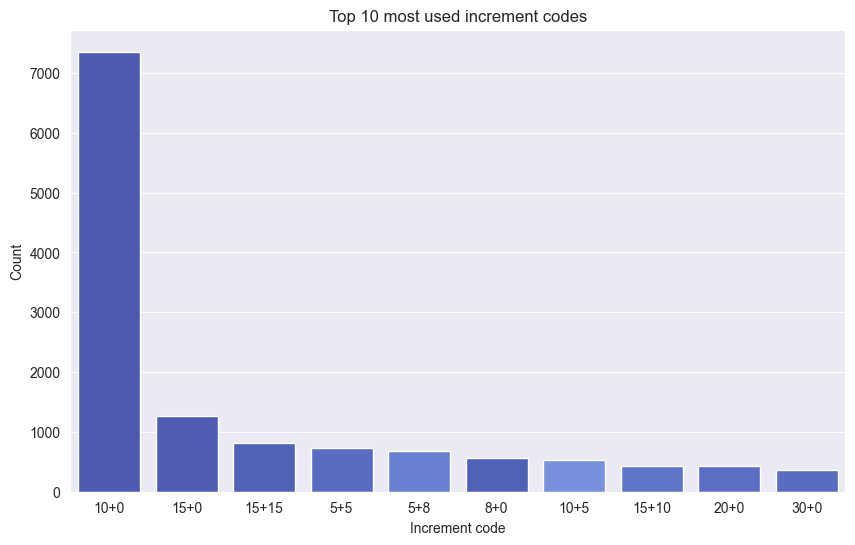

In [38]:
# plot the top 10 most used increment codes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='increment_code', hue='increment_code', order=df['increment_code'].value_counts().iloc[:10].index, palette='coolwarm')
plt.title("Top 10 most used increment codes")
plt.xlabel('Increment code')
plt.ylabel('Count')
plt.show()

In [33]:
# Let's extract the minutes and the seconds of increment per move
df['increment_code'] = df['increment_code'].astype(str)
df['minutes_per_player'] = df['increment_code'].apply(lambda x: int(x.split('+')[0]))
df['increment'] = df['increment_code'].apply(lambda x: int(x.split('+')[1]))
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration,created_at_precision,last_move_at_precision,minutes_per_player,increment
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,...,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0 days 00:00:00,6,6,15,2
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,...,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0 days 00:00:00,6,6,5,10
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,...,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0 days 00:00:00,6,6,5,10
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,...,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4,0 days 00:00:00,6,6,10,0
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,...,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,0 days 00:00:00,6,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,...,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,0 days 00:05:21.734000,13,13,10,10
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,...,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,0 days 00:12:24.219000,12,13,10,0
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,...,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,0 days 00:02:52.834000,13,13,10,0
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,...,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,0 days 00:15:46.699000,13,13,10,0


In [34]:
df['minutes_per_player'].describe()

count    19113.000000
mean        13.785277
std         17.072447
min          0.000000
25%         10.000000
50%         10.000000
75%         15.000000
max        180.000000
Name: minutes_per_player, dtype: float64

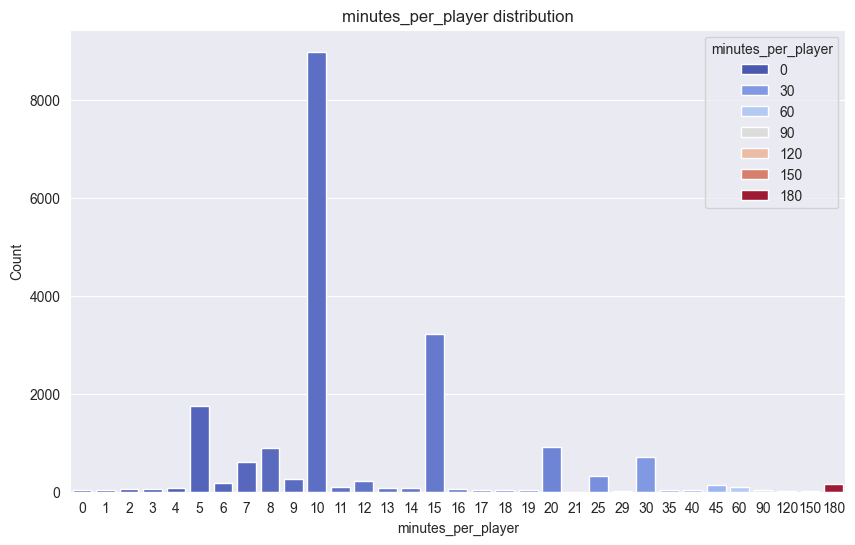

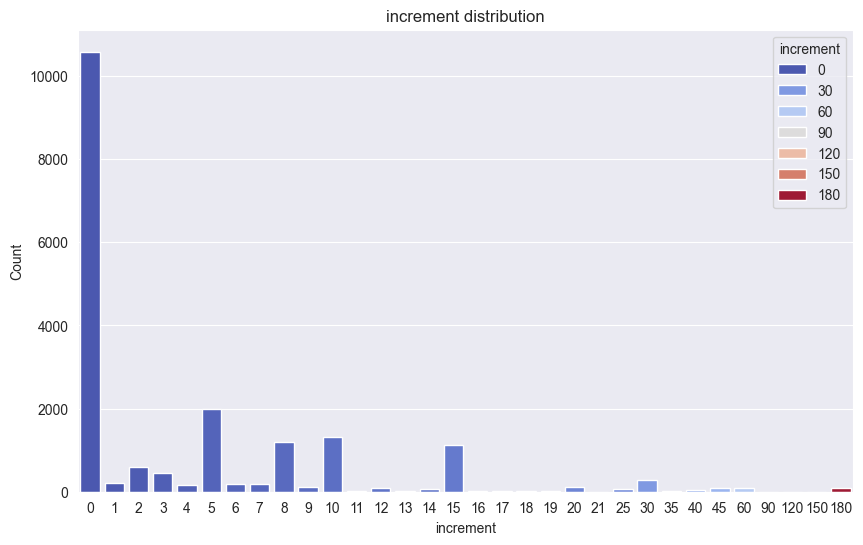

In [35]:
plot_distribution(df, 'minutes_per_player')
plot_distribution(df, 'increment')

The correlation Between game duration

In [41]:
# Let's extract the minutes and the seconds of increment per move for the precise duration dataset
precise_duration_df['increment_code'] = precise_duration_df['increment_code'].astype(str)
precise_duration_df['minutes_per_player'] = precise_duration_df['increment_code'].apply(lambda x: int(x.split('+')[0]))
precise_duration_df['increment'] = precise_duration_df['increment_code'].apply(lambda x: int(x.split('+')[1]))
print(precise_duration_df)

print("Correlation between the number of minutes per player and the game duration for games without increment:")
print(get_correlation(precise_duration_df[precise_duration_df['increment'] == 0], 'minutes_per_player', 'game_duration'))

             id  rated    created_at  last_move_at  turns victory_status  \
9287   cr5iuIrQ   True  1.425386e+12  1.425386e+12      3      outoftime   
9288   FtVjeTvc  False  1.424254e+12  1.424255e+12     50           mate   
9289   qblESqQn  False  1.424253e+12  1.424254e+12     30           mate   
9290   SeWWAAH8  False  1.424252e+12  1.424253e+12     50           mate   
9291   niw2zjOi   True  1.421311e+12  1.421312e+12     10      outoftime   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code      white_id  white_rating            black_id  \
9287   w